# Finding the minimum of an arbitrary function using optimizers from Keras

This notebook was created to show how you can employ optimazers from Keras to find the minimum/maximum of an arbitrary multivariable function.

It can be done by pure TensorFlow or Theano but it is better to have high level code which enables you to switch between backends whenever you want. In addition, Theano unlike TensorFlow doesn't have its own builtin optimizers so you would have to implement it yourself.

In [1]:
%matplotlib inline

from __future__ import print_function

import os
# os.environ['KERAS_BACKEND'] = 'theano'

# import some necessary packages
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

# import keras backend and optimizers
from keras import backend as K
from keras import optimizers

Using TensorFlow backend.


## Function

Let the function be the [Rosenbrock function](https://en.wikipedia.org/wiki/Rosenbrock_function):
$$f(x,y)=(a-x)^{2}+b(y-x^{2})^{2}$$

It is just a toy example, your real function might be more complicated and have many more parameters to optimise.

In [2]:
a = 1
b = 10

def f(x, y):
    return (a - x) ** 2 + b * (y - x ** 2) ** 2

The function looks like that:

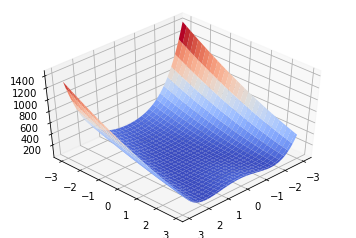

In [3]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.view_init(45, 45)

x = np.arange(-3, 3, 0.1)
y = np.arange(-3, 3, 0.1)
x, y = np.meshgrid(x, y)
z = f(x, y)

ax.plot_surface(x, y, z, cmap=cm.coolwarm, antialiased=True);

## Code

Here we define a function that makes several steps towards the function minimum using a specified optimizer and two functions to show these steps.

In [4]:
def find_min(x, y, opt, steps_count=20):
    '''Initializes function and takes steps_count steps towards the function minimum'''
    # define variables (parameters)
    X = K.variable(x, name='x')
    Y = K.variable(y, name='y')

    # define the function
    # as keras.variable objects support standart math operators 
    # we can just pass them to the f
    F = f(X, Y)
    
    # make the function that updates the parameters X and Y of F to minimize F's value
    updates = opt.get_updates([X, Y], [], F)

    # this function returns the F's value and updates the parameters
    iterate = K.function([], [F, X, Y], updates)

    steps = []
    # we run gradient descent for steps_count steps
    prx, pry = x, y  # previous values 
    for i in range(steps_count):
        step = iterate([])  # it returns F's current value and updated X, Y values
        steps.append((step[0], prx, pry))
        prx, pry = step[1], step[2]
    
    return steps

def print_path(steps):
    '''Prints function values and points coordinates'''
    for step in steps:
        print('f: %f,\tx: %f,\ty: %f' % tuple(step))
        
def visualize_path(steps):
    '''Shows a plot with function countors, start point and path to the end point'''
    plt.contourf(x, y, z, np.linspace(0, z.max(), 50), cmap=cm.coolwarm, antialiased=True)
    plt.gca().set(aspect='equal')
    steps = np.array(steps)
    plt.plot(steps[:, 1], steps[:, 2], 'r.')
    plt.plot(steps[0, 1], steps[0, 2], 'ro')  # start point
    plt.plot(steps[-1, 1], steps[-1, 2], 'rx')  # end point  

## Testing of optimizers

Let's now try some optimizers with different parameters

In [5]:
# start point
px, py = -2.5, -2.0

f: 692.875000,	x: -2.500000,	y: -2.000000
f: 67.764633,	x: -0.919200,	y: -1.686500
f: 22.453543,	x: -0.061143,	y: -1.456656
f: 27.118574,	x: 0.634704,	y: -1.239867
f: 57.453159,	x: 1.177989,	y: -1.008621
f: 87.557968,	x: 1.488615,	y: -0.739009
f: 77.580658,	x: 1.533951,	y: -0.427203
f: 43.270092,	x: 1.407844,	y: -0.094119
f: 16.090534,	x: 1.225150,	y: 0.234507
f: 3.105619,	x: 1.047903,	y: 0.541026
f: 0.010240,	x: 0.900097,	y: 0.815265
f: 1.889213,	x: 0.788901,	y: 1.051859
f: 5.517203,	x: 0.715033,	y: 1.248565
f: 9.068881,	x: 0.677123,	y: 1.405313
f: 11.558311,	x: 0.673464,	y: 1.523680
f: 12.477252,	x: 0.702523,	y: 1.606587
f: 11.643894,	x: 0.762702,	y: 1.658171
f: 9.213374,	x: 0.851476,	y: 1.683725
f: 5.783146,	x: 0.963994,	y: 1.689669
f: 2.430155,	x: 1.091450,	y: 1.683381


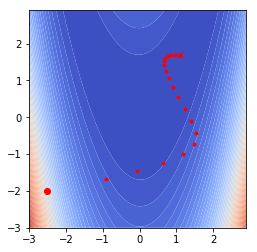

In [6]:
# try an optimizer
opt = optimizers.SGD(nesterov=True, momentum=0.9, lr=0.001)
steps = find_min(px, py, opt)
visualize_path(steps)
print_path(steps)

Min value 1.71278


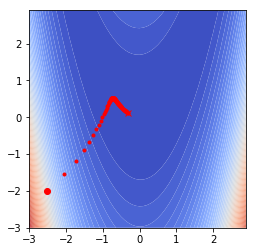

In [7]:
# try another optimizer
# opt = optimizers.Adagrad(lr=1.5)
opt = optimizers.Adadelta(lr=1000)
steps = find_min(px, py, opt, 100)
visualize_path(steps)
# print_path(steps)
print('Min value', steps[-1][0])

Min value 0.411701


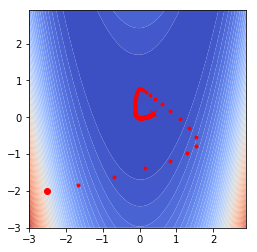

In [8]:
# try SGD with another parameters
opt = optimizers.SGD(nesterov=False, momentum=0.8, lr=0.001)
steps = find_min(px, py, opt, 100)
visualize_path(steps)
# print_path(steps)
print('Min value', steps[-1][0])